In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [6]:
from predrain import *
sz = 256
nt = 1
bs = 1
num_gpus = 1
gpu_start = 0
pred_mode = PredMode.Skip1

In [7]:
mt = ModelType.PredNetLeakyRelu

In [8]:
P = Predrain()
P.set_config(sz, nt, bs, mt, num_gpus, gpu_start, pred_mode, allow_growth=False)

In [13]:
P.get_model(mt, output_mode='prediction', stateful=True)

In [10]:
P.get_data(pred_mode='skip', idx=3, nt=5)

((<tf.Tensor 'IteratorGetNext_2:0' shape=(?, 1, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros_2:0' shape=(1, 1) dtype=float32>),
 (<tf.Tensor 'IteratorGetNext_3:0' shape=(?, 1, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros_3:0' shape=(1, 1) dtype=float32>),
 22500,
 2500)

In [15]:
P.load(ModelType.PredNetLeakyRelu, 256, 'str', 2, by_name=True, comment='nt5_from_scratch')

OSError: Unable to open file (unable to open file: name = '../data/models/checkpoints/weights.PredNetLeakyRelu_256_str_nt5_from_scratch.02.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [16]:
x, y = P.trn_tensors
sess = K.get_session()
x_np = x.eval(session=sess)

In [31]:
t = P.denorm(x_np[0])

In [56]:
t[t > 80/255] = 0

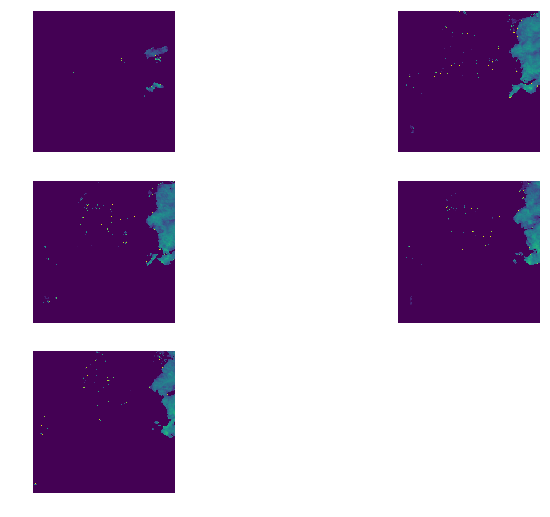

In [58]:
plots(t, figsize=(12, 12), rows=4)

In [10]:
x_np.shape

(1, 5, 256, 256, 1)

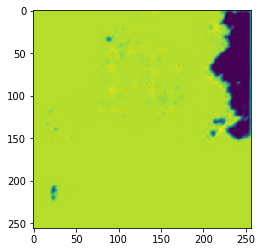

In [39]:
plt.imshow(d.squeeze())

In [29]:
P.model.reset_states()

TypeError: Invalid dimensions for image data

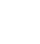

In [13]:
plots((d[0]*0.95 > 0.9).clip(0, 1), figsize=(12, 12), rows=4)

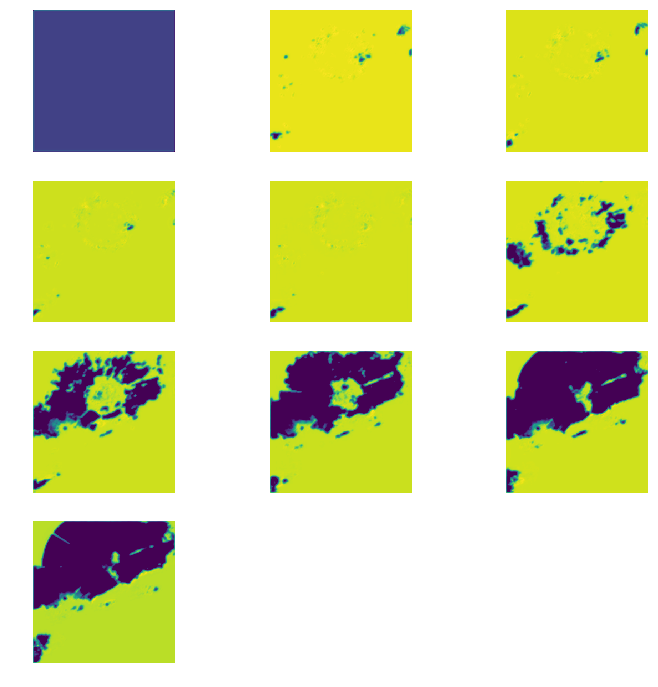

In [23]:
plots((d[0]), figsize=(12, 12), rows=4)

In [24]:
resized = [cv2.resize(o, (501, 501))[:,:,None] for o in d[0]]

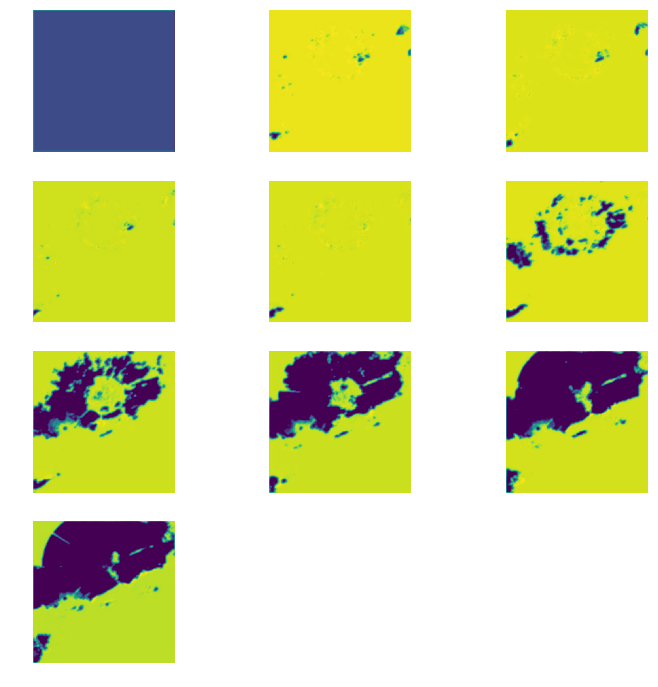

In [25]:
plots((resized), figsize=(12, 12), rows=4)

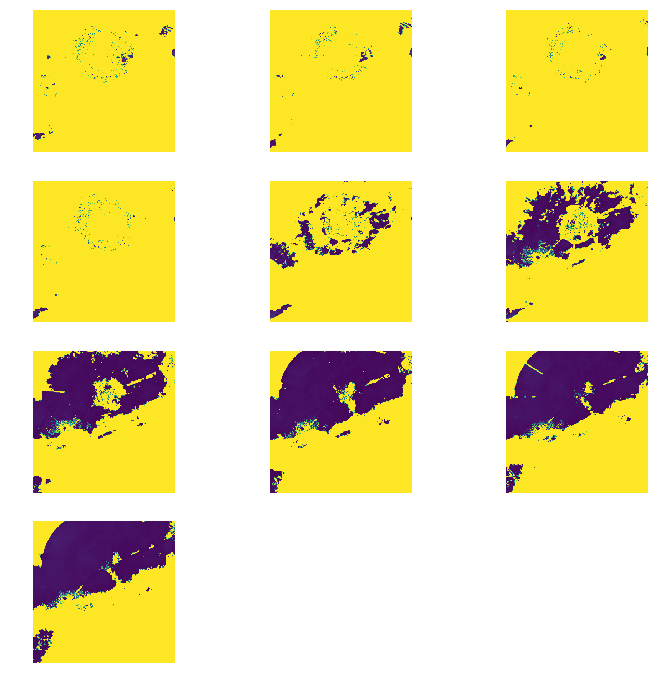

In [26]:
plots(x_np, figsize=(12, 12), rows=4)

## Script

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
%run submit --sz=256 --nt=5 --bs=10 --num_gpus=1 --gpu_start=0 --mt_idx=2 --pred_mode=1\
    --load_mt_idx=2 --load_sz=256 --load_idx=2 --comment=nt5_from_scratch --start

 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                     | 553/1000 [18:08<14:39,  1.97s/it]

In [3]:
from predrain import *

In [4]:
save_path = Path('../data/submission/PredNetLeakyRelu_256_Skip1_nt5_from_scratch/')

In [93]:
save_path = Path('../data/SRAD2018/SRAD2018_Test_1/RAD_266482434279545//')

In [94]:
preds = sorted(save_path.glob('*.png'))

In [95]:
ims = np.asarray([open_greyscale(o, False) for o in preds])

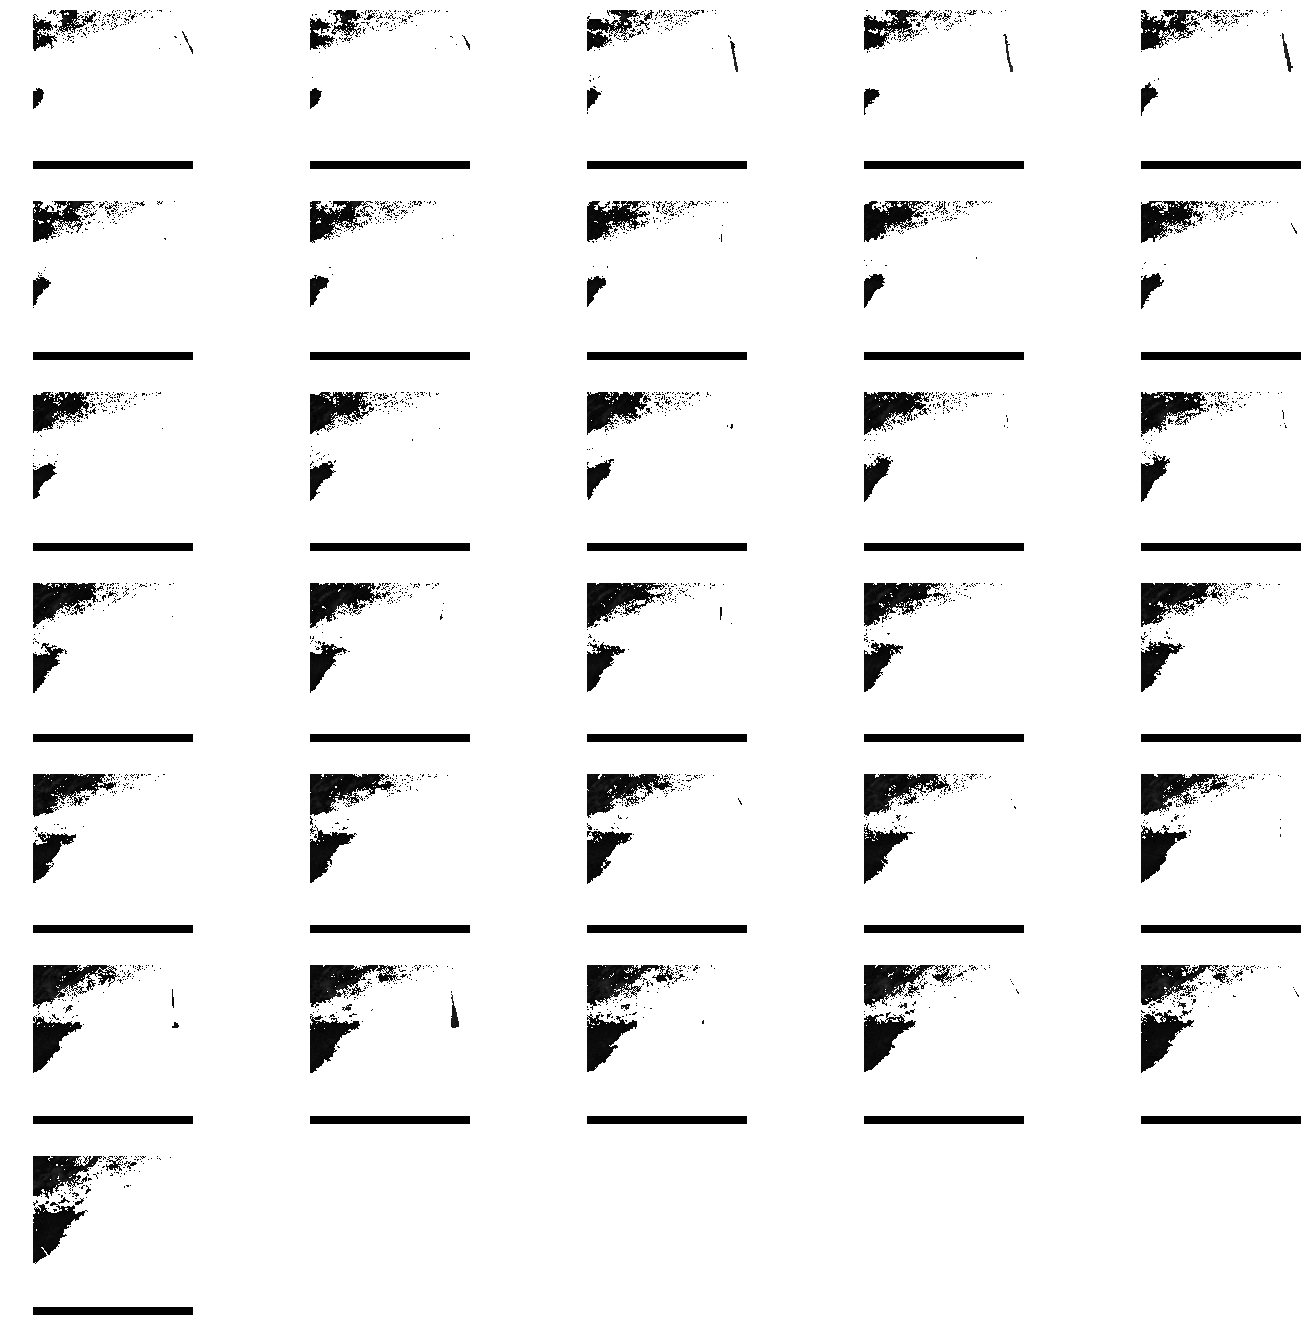

In [97]:
plots(1-ims, (24, 24), 7, vmin=0, vmax=1, cmap=plt.get_cmap('Greys'))

In [43]:
from matplotlib import colors

In [76]:
def norm_ims(ims):
    ret = np.empty_like(ims)
    for i in range(ims.shape[0]):
        im = ims[i]
        norm = colors.Normalize(im.min(), im.max())
        ret[i] = norm(im)
    return ret

In [91]:
norm = norm_ims(ims)

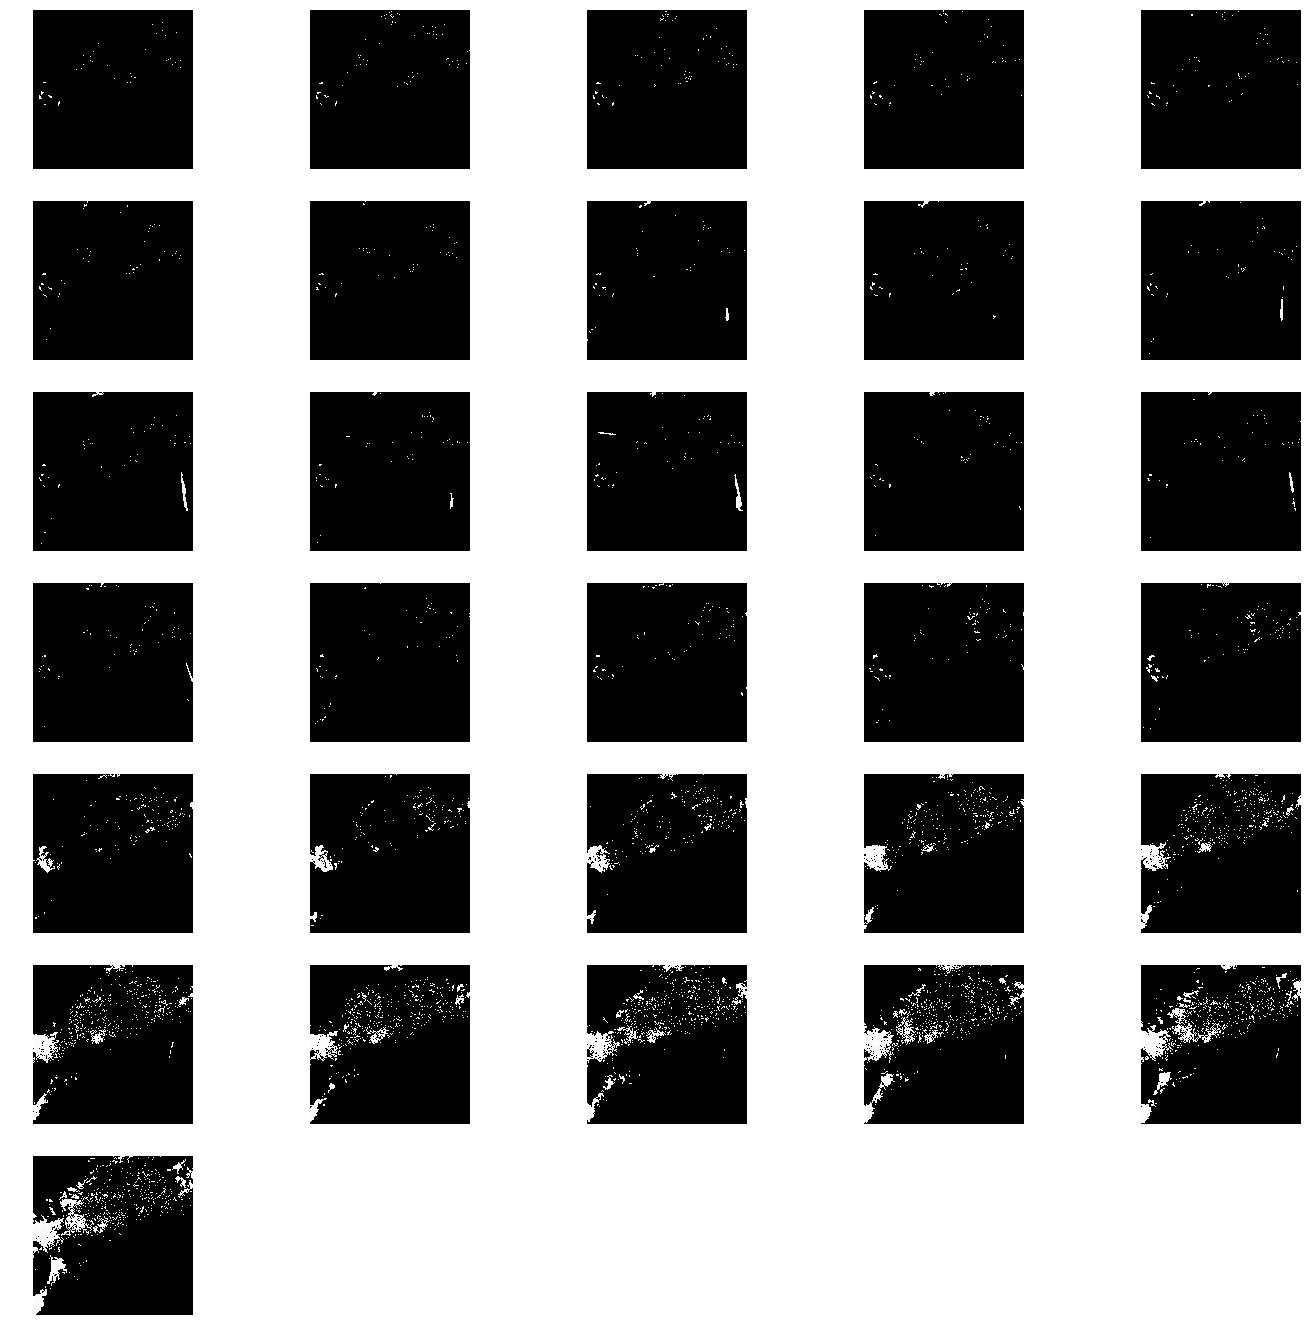

In [92]:
plots(norm, (24,24), 7, cmap=plt.get_cmap('Greys'))

In [55]:
[o.std() for o in norm]

[0.28426102,
 0.28495002,
 0.2856946,
 0.2863733,
 0.28005558,
 0.28181037,
 0.27068597,
 0.06549027,
 0.07073909,
 0.049519915,
 0.054392837,
 0.042322453,
 0.048461754,
 0.03988963,
 0.12864435,
 0.11978722,
 0.09718465,
 0.089046024,
 0.08383977,
 0.07048539,
 0.07972409,
 0.1643206,
 0.17865105,
 0.12774037,
 0.13977525,
 0.10579758,
 0.12377024,
 0.09752191,
 0.41732162,
 0.40749198,
 0.38659516,
 0.33939263,
 0.36558765,
 0.32803538,
 0.36013016,
 0.22359064,
 0.21533366,
 0.17493327,
 0.17181246,
 0.15223786,
 0.14575775,
 0.15104368,
 0.3618538,
 0.36337623,
 0.3405998,
 0.31067047,
 0.30897227,
 0.29573894,
 0.2861367,
 0.29265928,
 0.286418,
 0.245076,
 0.23150206,
 0.20443635,
 0.18731771,
 0.20005623,
 0.21270268,
 0.2207365,
 0.20174833,
 0.19564396,
 0.18993515,
 0.17428325,
 0.18778737,
 0.021003013,
 0.019996198,
 0.036127117,
 0.041879013,
 0.06999859,
 0.0642529,
 0.07009582]